<a href="https://colab.research.google.com/github/fsammart/BA_TAXI_analisis/blob/master/BA_TAXI_analisis_semanal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anaálisis de trafico semanal y diario

## Preparación de entorno

En primer lugar armamos el entorno para trabajar sobre lenguaje R en colab.

In [19]:
Sys.setenv(PATH= paste("/conda/bin" , Sys.getenv("PATH"), sep = ":" ) )
install.packages('ggplot2', repos='http://cran.rstudio.com/')

install.packages('plotly', repos='http://cran.rstudio.com/')
install.packages('wesanderson', repos='http://cran.rstudio.com/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Instalación de librerías

Se utilizará ggplot2 para el grafico y en la variable cbp1 estará la paleta de colores


In [0]:
  # library
library(ggplot2)
library(plotly)

cbp1 <- c("#999999", "#E69F00", "#56B4E9", "#009E73",
          "#0072B2", "#D55E00", "#CC79A7")




## Importación de Datos

Se importan los datos en formato CSV que estan publicados en github.

El csv que se importa ya ha sido preprocesado.

### Preprocesamiento

El preprocesamiento consisitio de 2 etapas:

1) Se agregaron 2 columnas al csv original, una indica el dia de la semana de la
fecha de inicio, mientras que la otra el momento del día segun la hora de inicio.

La categorización para momento del día fue la siguiente:


*   Mañana -> 6 - 10 hs
*   Mediodía -> 10 -14 hs
*   Tarde -> 14 - 18 hs
*   Noche -> 18 - 22 hs
*   Madrugada -> 22 - 6 hs

El horario de madrugada fue elegido para coincidir con el horario del aumento
del precio por horario nocturno. El aumento es del 20% respecto a la tarifa diurna

2) Publicando el nuevo csv en data.world se realizo una consulta SQL para agrupar según dia de la semana y momento del día y contar la cantidad de viajes para cada categoria




In [21]:
weekday_groupby <- read.csv("http://fsammart.github.io/BA_TAXI_analisis/bataxi_groupby_weekday.csv" , fileEncoding = "utf-8", skipNul = TRUE )
weekday_groupby$dia_de_semana <- factor(weekday_groupby$dia_de_semana,levels = c("Sunday", "Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday"),
                                        labels=c("Domingo", "Lunes", "Martes","Miércoles","Jueves","Viernes","Sabado"))

weekday_groupby


dia_de_semana,momento_dia,count
<fct>,<fct>,<int>
Martes,Noche,420
Miércoles,Madrugada,642
Jueves,Madrugada,769
Sabado,Tarde,335
Jueves,Mañana,679
Sabado,Mañana,298
Miércoles,Mediodia,315
Viernes,Mañana,722
Sabado,Mediodia,318


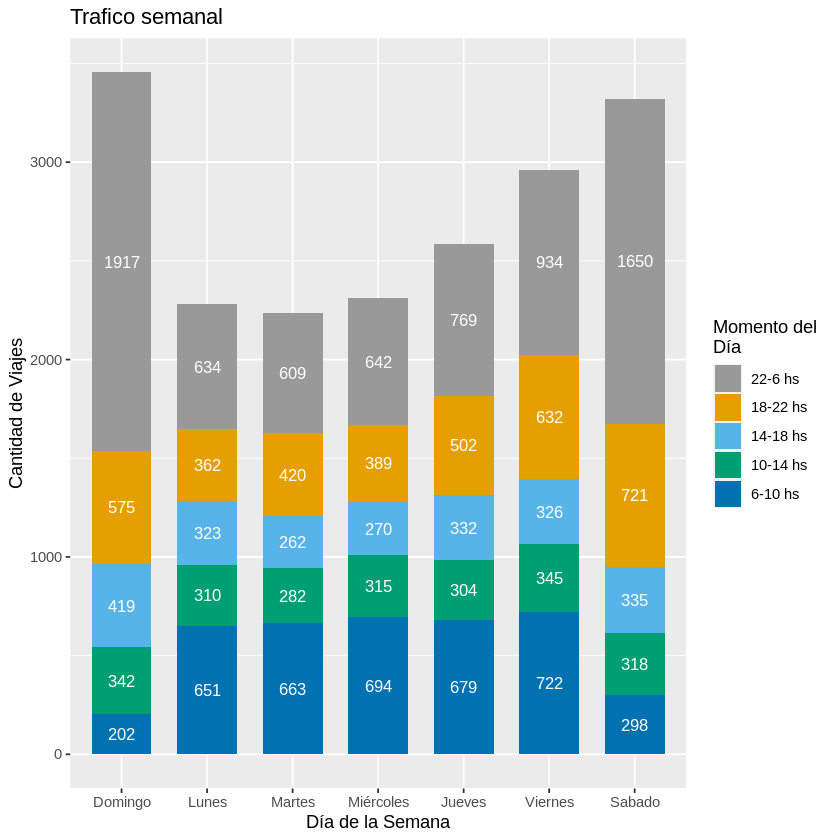

In [22]:
# Para que las etiquetas queden con los tags correspondientes se realiza la siguiente modificación.
weekday_groupby$momento_dia <- factor(weekday_groupby$momento_dia ,levels = c("Madrugada", "Noche", "Tarde", "Mediodia","Mañana"), labels=c("22-6 hs", "18-22 hs", "14-18 hs", "10-14 hs","6-10 hs"))
# Stacked
p <- ggplot(weekday_groupby, aes(fill=momento_dia, y=count, x=dia_de_semana)) + 
  geom_bar(position = position_stack(), stat = "identity", width = .7) +
  geom_text(aes(label = count), position = position_stack(vjust = .5), color="white", size=3.5) +
  ggtitle("Tráfico semanal") +
  labs(x = "Día de la Semana" , y = "Cantidad de Viajes")+
  scale_fill_manual(name = 'Momento del \nDía' , values = cbp1)

p

## Análisis del Grafico

## A nivel Semanal

Se puede ver que los días de mayor demanda de taxis son los viernes, sabados, y sobre todo los domingos. El orden de trafico semanal de más bajo a más alto es :
Martes -> Lunes -> Miércoles -> Jueves -> Viernes -> Sábado y Domingo

## Analizando los momentos del día

Se puede ver en azul (horario Mañana) que aumenta la demanda los dias laborales, y baja para los fines de semana.

En contraposición a lo anterior, la franja madrugada (22 - 6hs) aumenta los fines de semana y disminuye los días laborales.

La franja verde (Mediodía), y la celeste (Tarde) se mantiene relativamente constante a lo largo de todos los días.

La naranja (horario noche) presenta en mucho menor escala, la misma tendendencia que la madrugada. Esto sugiere que forma parte del mismo grupo. Sin embargo se realizo la división por la cuestión de aumento de tarifas.